In [12]:
import numpy as np
import pandas as pd
import os
import scipy 
from scipy.interpolate import RegularGridInterpolator

%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
# PANCAKE MODEL FROM: https://zenodo.org/records/4574249
vmod_file = '/home/birniece/Documents/data/ToC2ME/VelocityModels/ToC2MEVelModel.mat'

In [14]:
mod_zprofile = scipy.io.loadmat(vmod_file)
mod_zprofile.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Mar  2 10:54:39 2021'), ('__version__', '1.0'), ('__globals__', []), ('rho', array([[2400],
       [2400],
       [2400],
       ...,
       [2700],
       [2700],
       [2700]], dtype=uint16)), ('vp', array([[2500.     ],
       [2500.     ],
       [2500.     ],
       ...,
       [4888.76343],
       [4888.76343],
       [4888.76343]])), ('vs', array([[1250.        ],
       [1250.        ],
       [1250.        ],
       ...,
       [2758.16173352],
       [2758.16173352],
       [2758.16173352]])), ('z', array([[   0],
       [   1],
       [   2],
       ...,
       [5998],
       [5999],
       [6000]], dtype=uint16))])

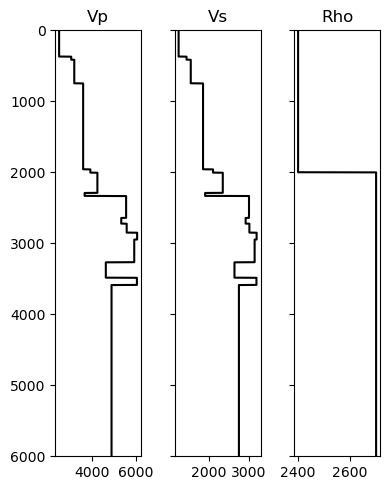

In [20]:
z = mod_zprofile['z']
vp_1D = mod_zprofile['vp']
vs_1D = mod_zprofile['vs']
rho_1D = mod_zprofile['rho']

fig,axs = plt.subplots(1,3,figsize=[4,5], sharey=True)
axs[0].plot(vp_1D, z,'k')
axs[1].plot(vs_1D, z,'k')
axs[2].plot(rho_1D, z,'k')

axs[0].set_title('Vp')
axs[1].set_title('Vs')
axs[2].set_title('Rho')

for ax in axs:ax.set_ylim(6000,0)
fig.tight_layout()

---------------------

# Geometry
rec file from : https://github.com/ToC2ME/ToC2ME/blob/master/Rodriguez-Pradilla/LinEpiLoc_ToC2ME_Demo/ToC2ME_Demo_recloc.txt\

    Receivers' location from the Shallow-Borehole monitoring array
    "NL" network code in IRIS database
    Relative coordinates in metres
    Input File: ToC2ME_Demo_recloc.txt 

In [23]:
rec_file = '/home/birniece/Documents/data/ToC2ME/Receivers/ToC2ME_Demo_recloc.txt'

In [29]:
recDF = pd.read_csv(rec_file)
recDF.head()

,StationName,NAD83_X_m,NAD83_Y_m,z_m,DrillDepth_m,LoadedDepth_m
0,1,3422.9603,2117.611,919.293356,27,27
1,2,4288.1870,2072.621,908.303961,27,27
2,3,6782.7966,2903.516,900.890654,27,24
3,4,3235.7770,2588.658,923.843327,27,27
4,5,3700.0376,3062.286,911.115825,27,27


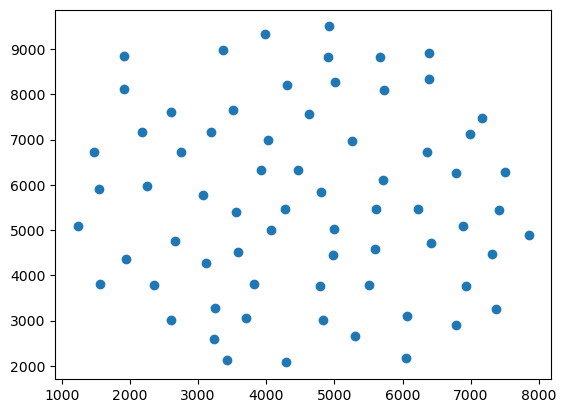

In [28]:
plt.scatter(x=recDF['NAD83_X_m'],
            y=recDF['NAD83_Y_m'])


In [34]:
# determine lateral model extents from 
xmin = min(recDF['NAD83_X_m'])
xmax = max(recDF['NAD83_X_m'])
print('X', xmin, xmax)

ymin = min(recDF['NAD83_Y_m'])
ymax = max(recDF['NAD83_Y_m'])
print('Y', ymin, ymax)

zmin = min(recDF['z_m'])
zmax = max(recDF['z_m'])
print('Z', zmin, zmax)

X 1234.56709999999 7849.87270000001
Y 2072.62100000028 9502.92899999954
Z 816.2254735 971.0501945
